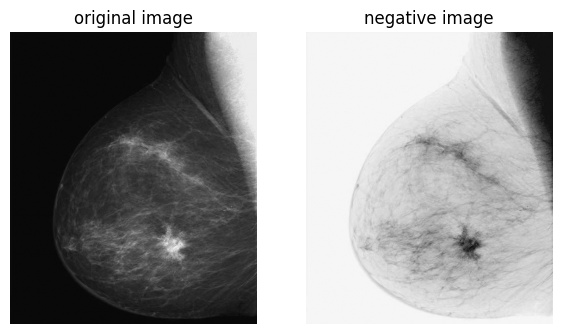

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('images/breat-xray.tif', 0)

neg_img = (256 - 1 - img)

fig , axe = plt.subplots(1,2, figsize=(7,7))

axe[0].imshow(img, cmap='gray')
axe[0].axis('off')
axe[0].set_title('original image')

axe[1].imshow(neg_img, cmap='gray')
axe[1].axis('off')
axe[1].set_title('negative image')
plt.show()

In [ ]:
# scaling image
# s = cr
import numpy as np

img = cv2.imread('images/scaling_img.png')
scaled_img = (255 * (1.6 * img/255)).astype(np.uint8);

fig, ax = plt.subplots(1,2, figsize=(8,8))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(scaled_img, 'gray')
ax[1].set_title("scaled image")
ax[1].axis('off')

plt.show()

C:\Users\Hamza Bhutto\AppData\Local\Temp\ipykernel_2208\2923997728.py:4: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\Hamza Bhutto\AppData\Local\Temp\ipykernel_2208\2923997728.py:4: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))


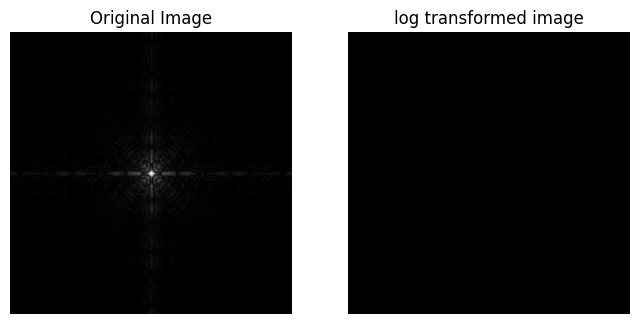

In [4]:
img = cv2.imread('images/fig.tif', 0)


c = 255 / np.log(1 + np.max(img))

log_img = (c * np.log(2+img)).astype(np.uint8)
fig, ax = plt.subplots(1,2, figsize=(8,8))

ax[0].imshow(img, 'gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(log_img, 'gray')
ax[1].set_title("log transformed image")
ax[1].axis('off')

plt.show()

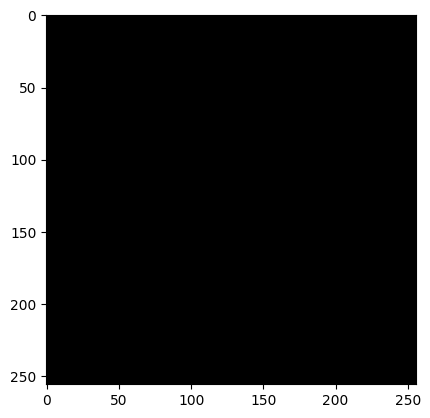

In [5]:
# inverse log
inv_img = np.exp(log_img).astype(np.uint8)
plt.imshow(inv_img, cmap="gray")

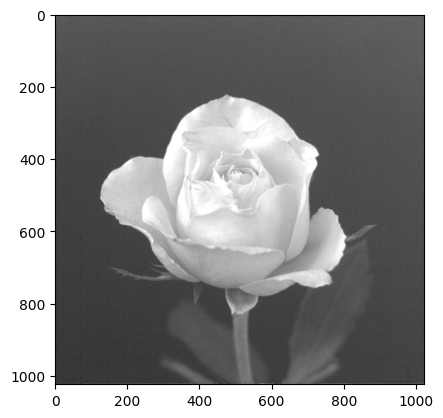

In [29]:
img = cv2.imread('images/rose.tif', 0)

gamma = 0.4

p_img = (255 * (img / 255)**gamma).astype(np.uint8)

plt.imshow(p_img ,cmap='gray')

(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

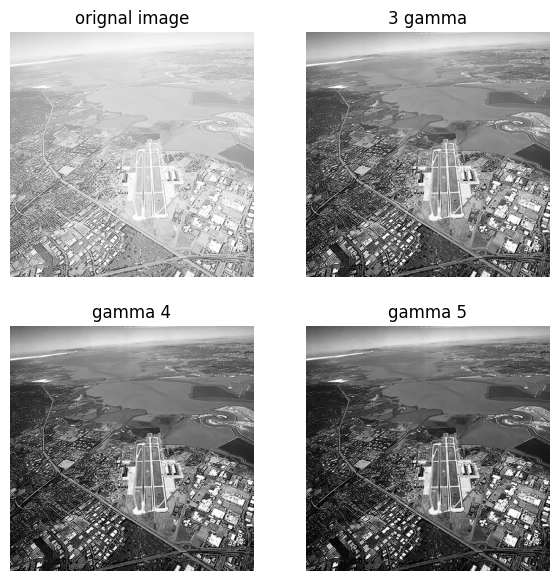

In [13]:
# compare intensity level with different gamma value

img = cv2.imread('images/fig1.tif', 0)

img_gamma2 = (255 * (img / 255) ** 3).astype(np.uint8)
img_gamma3 = (255 * (img/255)**4).astype(np.uint8)
img_gamma4 = (255 * (img/255)**5).astype(np.uint8)


fig , axe = plt.subplots(2,2, figsize=(7,7))

axe[0,0].imshow(img, cmap='gray')
axe[0,0].set_title('orignal image')
axe[0,0].axis('off')

axe[0,1].imshow(img_gamma2, cmap='gray')
axe[0,1].set_title('3 gamma')
axe[0,1].axis("off")

axe[1,0].imshow(img_gamma3, cmap='gray')
axe[1,0].set_title('gamma 4')
axe[1,0].axis("off")

axe[1,1].imshow(img_gamma4, cmap='gray')
axe[1,1].set_title('gamma 5')
axe[1,1].axis('off')

Text(0.5, 1.0, 'streched image')

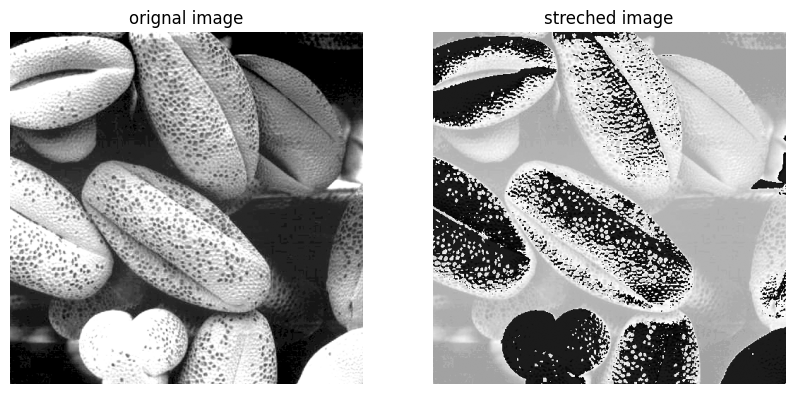

In [50]:
# constrast streching and k = 100

img = cv2.imread("images/fig2.tif",0)

streched_img = np.where(img<=100, img-30, img+30).astype(np.uint8)

fig, axe = plt.subplots(1,2, figsize=(10,10))

axe[0].imshow(img , cmap='gray')
axe[0].axis('off')
axe[0].set_title("orignal image")

axe[1].imshow(streched_img, cmap='gray')
axe[1].axis("off")
axe[1].set_title('streched image')

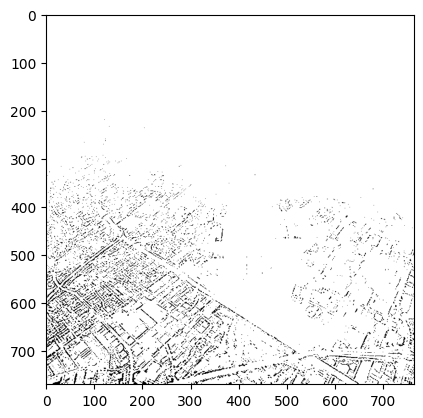

In [6]:
# bineary thresholding

img = cv2.imread("images/fig1.tif",0)
thr_img = np.where(img <= 100, 0, 255).astype(np.uint8)

plt.imshow(thr_img, cmap='gray')
plt.show()

(np.float64(-0.5), np.float64(719.5), np.float64(827.5), np.float64(-0.5))

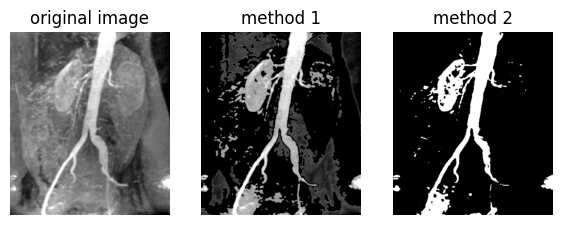

In [13]:
# intensity level slicing 

img = cv2.imread('images/kidney.tif',0)

m = np.mean(img)
sliced_img = np.where((img > m - 30) & (img < m + 30), 0,img)

sliced_img2 = np.where(img < 145, 0, 255)

fig, axe = plt.subplots(1,3, figsize=(7,7))

axe[0].imshow(img, cmap='gray')
axe[0].axis("off")
axe[0].set_title("original image")

axe[1].imshow(sliced_img, cmap='gray')
axe[1].axis("off")
axe[1].set_title("method 1")

axe[2].imshow(sliced_img2, cmap='gray')
axe[2].set_title('method 2')
axe[2].axis('off')

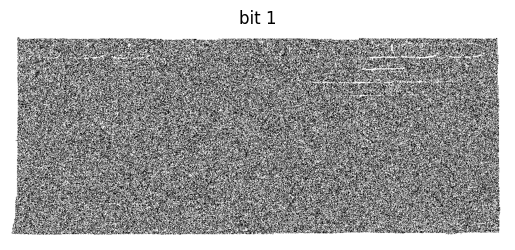

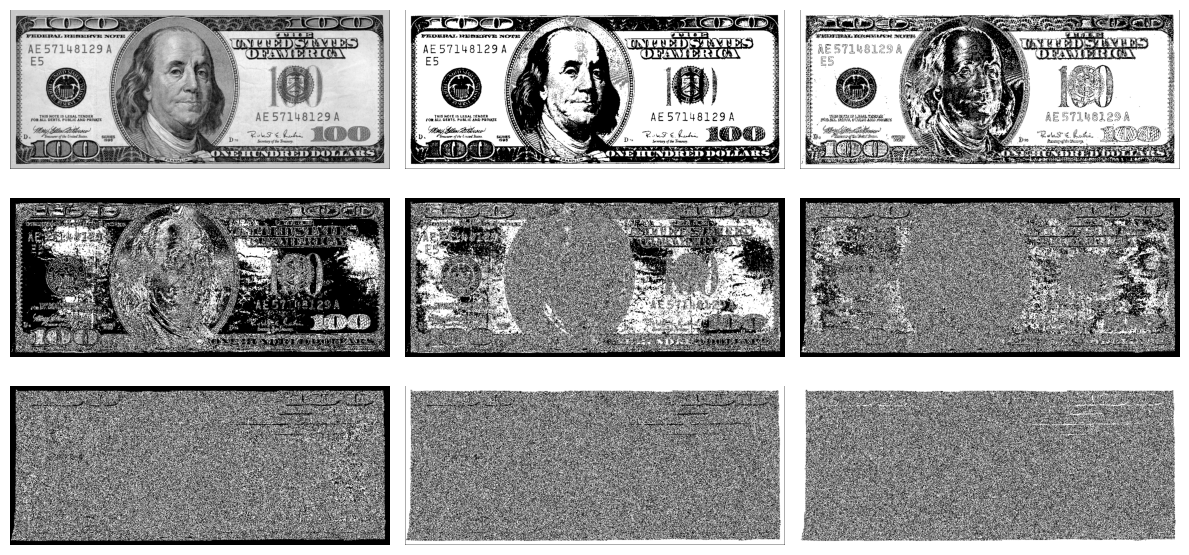

In [41]:
# bit plane slicing 
def imshow(img, title):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis('off')
    
img = cv2.imread('images/dollars.tif', 0)
imshow(img, 'original image')
    
bit_8 = np.where(img <= 127, 0, 1)
imshow(bit_8,'8 bit plane')

# 7 bit plane image
cond1 = img < 64
cond2 = (img < 192) & (img > 127)
bit_7 = np.where(cond1 | cond2 , 0 , 1)

# 6 bit plane image 
bit_5 =  np.zeros_like(img);

flag = False;
for i in range(0, 256, 16):
    if flag:
        bit_5[(img>=i) & (img<=i+16)] = 1;
    else:
        bit_5[(img>=i) & (img<=i+16)] = 0;
    flag = not flag;

imshow(bit_5, "5th Bit Plane");

# 5 bit plane image
bit_5 = np.zeros_like(img)
flag = False

for i in range(0, 256, 16):
    if flag:
        bit_5[(img >= i) & (img <= i + 16)] = 1
    else:
        bit_5[(img >= i) & (img <= i + 16)] = 0
    flag = not flag
imshow(bit_5, "5 bit image")

# 4 bit plane image 
bit_4 = np.zeros_like(img)
flag = False

for i in range(0, 256, 8):
    if flag:
        bit_4[(img >= i) & (img <= i + 8)] = 1
    else:
        bit_4[(img >= i) & (img <= i + 8)] = 0
    flag = not flag
imshow(bit_4, 'bit 4')

# 3 bit plane image 
bit_3 = np.zeros_like(img)
flag = False

for i in range(0, 256, 4):
    if flag:
        bit_3[(img >= i) & (img <= i + 4)] = 1
    else:
        bit_3[(img >= i) & (img <= i + 4)] = 0
    flag = not flag
imshow(bit_3, 'bit 3')

# 2 bit plane image 
bit_2 = np.zeros_like(img)
flag = False

for i in range(0, 256, 2):
    if flag:
        bit_2[(img >= i) & (img <= i + 2)] = 1
    else:
        bit_2[(img >= i) & (img <= i + 2)] = 0
    flag = not flag
imshow(bit_2, 'bit 2')


# 1 Bit plane 
bit_1 = np.where(img%2 == 0, 1,0)
imshow(bit_1, 'bit 1')


fig, axe = plt.subplots(3,3, figsize=(12,6))
images = [img,bit_8,bit_7,bit_6,bit_5,bit_4,bit_3,bit_2,bit_1]

im = 0
for i in range(3):
    for j in range(3):
        axe[i,j].imshow(images[im], cmap='gray')
        axe[i,j].axis('off')
        im += 1
plt.tight_layout()